# Исследование данных о продаже игр

### Описание проекта

Из открытых источников доступны исторические данные за 2016 год о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). 
<br>Для планирования кампании на следующий год нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.

**Оглавление**
* [[Открытие файла с данными и изучение общей информации](#p1)](#section_id)<a id='section_id1'></a>
* [[Предобработка данных](#p2)](#section_id)<a id='section_id2'></a>
* [[Исследовательский анализ данных](#p3)](#section_id)<a id='section_id3'></a>
* [[Составление портрета пользователя каждого региона](#p4)](#section_id)<a id='section_id4'></a>
* [[Проверка гипотез](#p5)](#section_id)<a id='section_id5'></a>
* [[Общий вывод](#p6)](#section_id)<a id='section_id6'></a>

<a id='p1'></a> 
### [Открытие файла и изучение общей информации](#section_id1)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [3]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv(r'C:\Users\spk-s\Downloads\games.csv')

**Общая информация о данных**

In [4]:
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7941,Jackie Chan Adventures: Legend of the Dark Hand,GBA,2001.0,Action,0.13,0.05,0.00,0.00,NaN,NaN,NaN
10630,Earth Defense Force 2025.1: The Shadow of New ...,PS4,2015.0,Action,0.00,0.00,0.10,0.00,NaN,NaN,NaN
15144,Europa Universalis III Complete,PC,2008.0,Strategy,0.00,0.02,0.00,0.00,NaN,8.7,E10+
1085,Madden NFL 2001,PS,2000.0,Sports,1.58,0.05,0.00,0.04,90.0,6.8,E
10021,Phantasy Star Collection,GBA,2002.0,Role-Playing,0.08,0.03,0.00,0.00,76.0,8.1,E
12989,Rockin' Pretty,DS,2009.0,Misc,0.05,0.00,0.00,0.00,NaN,tbd,E
7123,TNA iMPACT!,PS2,2008.0,Fighting,0.10,0.00,0.00,0.12,NaN,NaN,NaN
14024,Galaxy Fight,SAT,1994.0,Fighting,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2435,LEGO Jurassic World,PS3,2015.0,Action,0.35,0.36,0.00,0.14,NaN,7.4,E10+
10563,X-Men: The Official Game,XB,2006.0,Action,0.08,0.02,0.00,0.00,53.0,8.1,T


In [5]:
games.describe().round(2)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


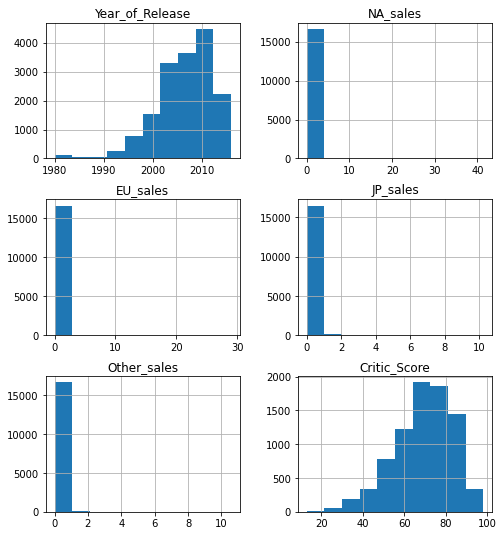

In [7]:
games.hist(figsize=(8, 9));

<a id='p2'></a>
### [Предобработка данных](#section_id2)
* [Обработка пропусков](#p2s1) 
* [Работа с типами данных в столбцах](#p2s2)
* [Добавление нового столбца](#p2s3)

<a id='p2s1'></a>
#### Обработка пропусков

In [8]:
# приведение к нижнему регистру названий столбцов
games.columns = games.columns.str.lower()

In [9]:
# проверка столбцов на наличие пропусков и их подсчет
games.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

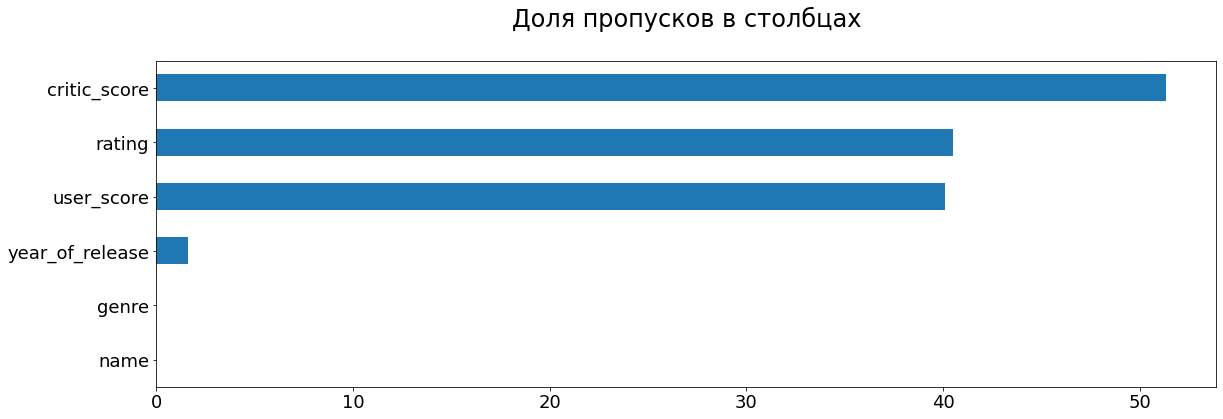

In [10]:
# бары для пропущенных значений
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), legend = False, fontsize = 18)
            .set_title('Доля пропусков в столбцах' + "\n", fontsize = 24)    
        );    
    except:
        print('пропусков не осталось :) ')
        
pass_value_barh(games)

In [11]:
# заполнение/удаление пропусков в некоторых столбцах
games = games.dropna(subset=['name', 'year_of_release'])

games['rating'] = games['rating'].fillna('RP')
games.loc[(games['user_score'] == "tbd") | (games['user_score'].isna()), 'user_score'] = np.nan

In [12]:
games['rating'].value_counts()

RP      6677
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [13]:
# замена некоторых малочисленных рейтингов на аналогичные
games.loc[(games['rating'] == 'K-A'), 'rating'] = 'E'
games.loc[(games['rating'] == 'AO'), 'rating'] = 'M'
games.loc[(games['rating'] == 'EC'), 'rating'] = 'RP'

В столбцах name, genre, year_of_release было незначительное количество пропусков относительно всего объема данных и их отсутствие нельзя было заполнить никакими приемлемыми значениями, поэтому от них мы избавляемся.
<br>Значения tbd в столбце с оценками пользователей будем считать пропусками.
<br>В столбце с оценками критиков лучше пропуски ничем не заполнять, т.к. это исказит результаты, удалить тоже нельзя, т.к. это значительная часть строк, поэтому оставим, как есть.
<br>В столбце с рейтингом ESRB тоже имелось большое количество пропусков, из мы просто заполняем значением 'RP' - рейтинг ожидается.
<br>Причиной пропусков в столбцах с оценками пользователй и критиков скорей всего стала необязательность заполнения данного поля, либо невысокая популярность игры, например. В столбце с рейтингом ESRB причиной пропусков могла стать необязательность этого критерия для выпуска игры в какой-либо стране/в какие-либо годы.

<a id='p2s2'></a> 
 #### Работа с типами данных в столбцах

In [14]:
# проверка типов данных столбцов
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [15]:
# замена типа данных в некоторых столбцах
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)

<a id='p2s3'></a>
#### Добавление нового столбца

In [16]:
# создание нового столбца с суммой продаж по всем приведенным регионам
games['sum_sales'] = (games['na_sales'] + games['eu_sales'] 
                      + games['jp_sales'] + games['other_sales'])
games.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


На данном этапе произвели замену типов данных в столбцах с годом выпуска игры и пользовательским рейтингом, т.к. они имели типы, которые потом отображали неправильные результаты, либо их вообще не удалось бы использовать для анализа. В остальных столбцах типы соответствовали логичному использованию значений - все буквенные значения принадлежат типу object, нецелочисленные - float.
<br>Далее был добавлен новый столбец с суммарным количеством продаж каждой игры для более удобного дальнейшего анализа.

<a id='p3'></a>
### [Исследовательский анализ данных](#section_id3)
* [Исследование распределения проданных игр по годам](#p3s1) 
* [Исследование распределения количества продаж каждой платформы по годам](#p3s2)
* [Исследование данных за актуальный период](#p3s3)
* [Оценка влияния отзывов на продажи топ-5 платформ](#p3s4)
* [Исследование зависимости прибыльности игр от жанров](#p3s5)

<a id='p3s1'></a>
#### Исследование распределения проданных игр по годам

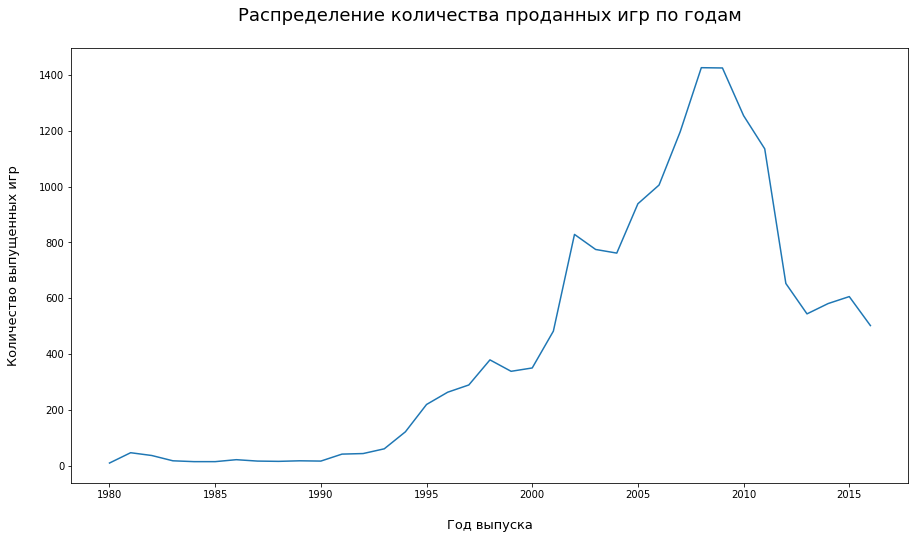

In [17]:
# распределение количества проданных игр за каждый год с 1980 по 2016
plt.figure(figsize=(15, 8))
games.groupby('year_of_release')['name'].count().plot()

ax = plt.gca()
ax.set_xlabel("\n" + 'Год выпуска', fontsize=13)
ax.set_ylabel('Количество выпущенных игр' + "\n", fontsize=13)
ax.set_title('Распределение количества проданных игр по годам' + "\n", fontsize=18);

In [18]:
games['year_of_release'].describe().round(1)

count    16444.0
mean      2006.5
std          5.9
min       1980.0
25%       2003.0
50%       2007.0
75%       2010.0
max       2016.0
Name: year_of_release, dtype: float64

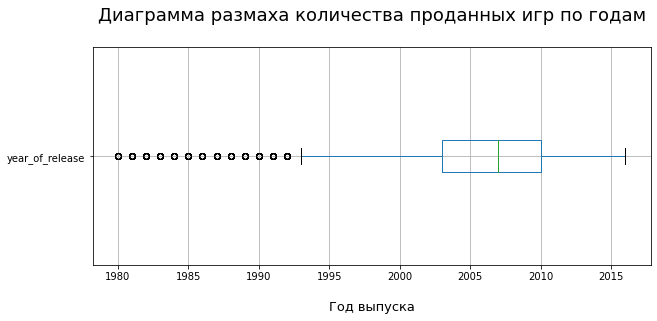

In [19]:
# диаграмма размаха для годов выпуска игр
games.boxplot('year_of_release', vert=False, figsize=(10, 4))

ax = plt.gca()
ax.set_xlabel("\n" + 'Год выпуска', fontsize=13)
ax.set_title('Диаграмма размаха количества проданных игр по годам' + "\n", fontsize=18);

In [20]:
# отбросим данные до 1994 года
games = games.query('year_of_release > 1993').reset_index(drop=True)

Данные до 1994 года можно отбросить, потому что:
- их количество незначительно;
- до этого года не были так распространены компьютеры, а следовательно и игры.

<a id='p3s2'></a>
#### Исследование распределения количества продаж каждой платформы по годам

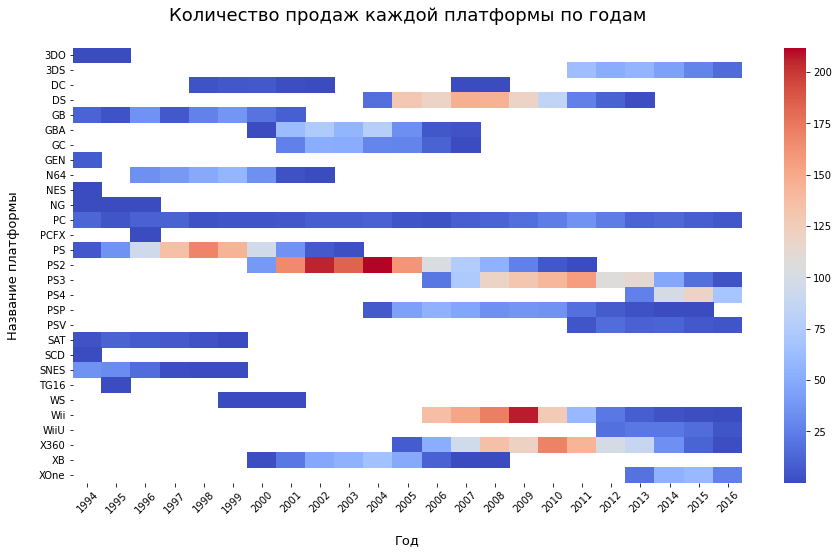

In [21]:
# изменение продаж платформ по годам
sale_year = games.pivot_table(index='platform', columns='year_of_release', \
                  values='sum_sales', aggfunc='sum')
plt.figure(figsize=(15, 8))
sns.heatmap(sale_year, cmap='coolwarm');

ax = plt.gca()
ax.set_xlabel("\n" + 'Год', fontsize=13)
ax.set_ylabel('Название платформы' + "\n", fontsize=13)
ax.set_title('Количество продаж каждой платформы по годам' + "\n", fontsize=18)
ax.tick_params(axis='x', labelrotation = 45);

In [22]:
# платформы с наибольшими суммарными продажами
top = games.pivot_table(index='platform', values='sum_sales', aggfunc='sum') \
     .sort_values(by='sum_sales', ascending=False).head(5)

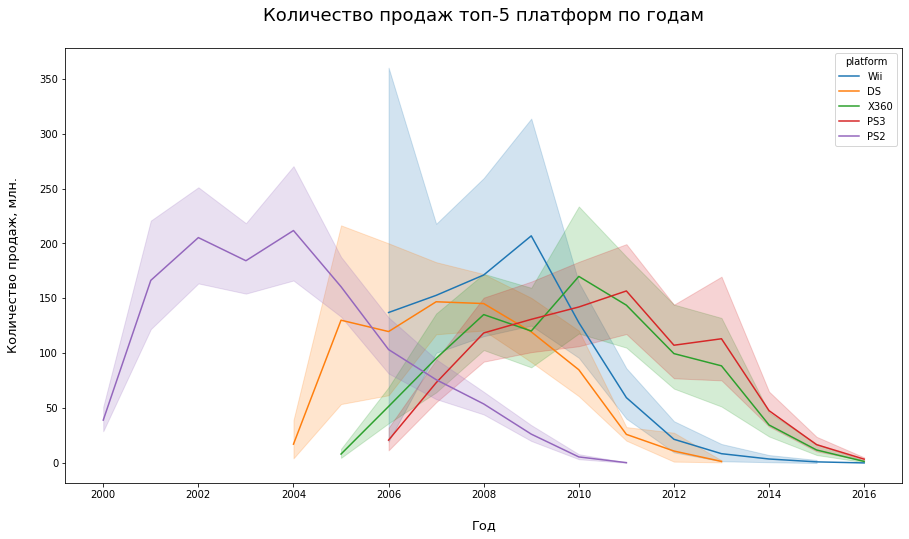

In [23]:
# распределение по годам продаж платформ из топ-5
top_5 = games.query('platform in @top.index')

plt.figure(figsize=(15, 8))
sns.lineplot(x='year_of_release', y='sum_sales', hue='platform', \
             data=top_5, estimator='sum')

ax = plt.gca()
ax.set_xlabel("\n" + 'Год', fontsize=13)
ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
ax.set_title('Количество продаж топ-5 платформ по годам' + "\n", fontsize=18);

Судя по графику, среднее время жизни платформ составляет около 10-11 лет, за это время им на смену приходят более современные версии.

Исходя из полученной информации, далее будем рассматривать только период 2012-2015 годов, так как данные после пика в сезоне 2007-2008 более-менее выровнялись только к 2012 году, а за 2016 год их недостаточно. К тому же в начале 2010-х происходила смена поколений многих консолей. Таким образом наш отчет после сужения временного периода будет наиболее актуален для планирования на 2017 год.

<a id='p3s3'></a>
#### Исследование данных за актуальный период

In [24]:
# оставляем в датасете только актуальные данные
games = games.query('2011 < year_of_release < 2016').reset_index(drop=True)

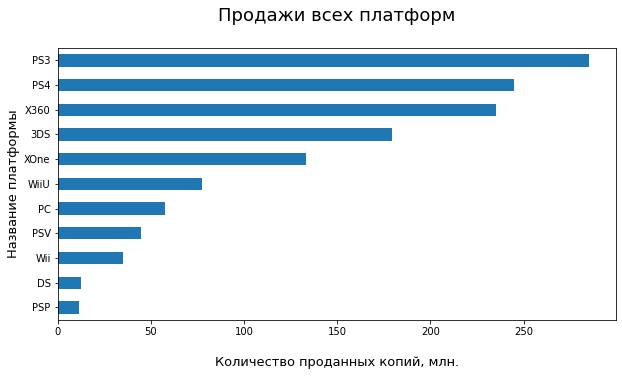

In [25]:
# количество проданных копий для всех платформ
games.groupby('platform')['sum_sales'].sum() \
     .to_frame() \
     .sort_values(by='sum_sales', ascending=True) \
     .plot(kind='barh', legend=False, figsize=(10, 5));

ax = plt.gca()
ax.set_xlabel("\n" + 'Количество проданных копий, млн.', fontsize=13)
ax.set_ylabel('Название платформы', fontsize=13)
ax.set_title('Продажи всех платформ' + "\n", fontsize=18);

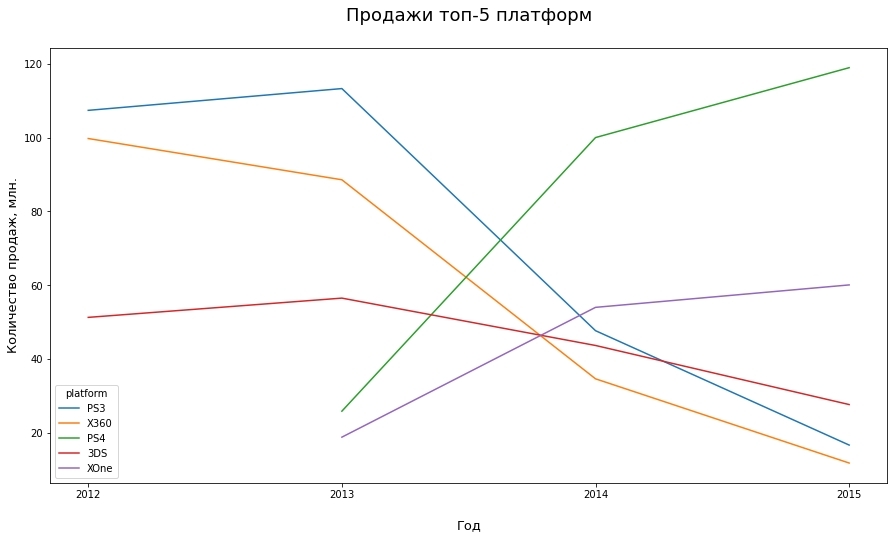

In [26]:
# топ-5 платформ-лидеров по продажам
top_5 = games.query('platform in ["PS3", "PS4", "X360", "3DS", "XOne"]')

plt.figure(figsize=(15, 8))
sns.lineplot(x='year_of_release', y='sum_sales', hue='platform', \
             data=top_5, estimator='sum', ci=None);

ax = plt.gca()
ax.set_xlabel("\n" + 'Год', fontsize=13)
ax.set_ylabel('Количество продаж, млн.', fontsize=13)
ax.set_title('Продажи топ-5 платформ' + "\n", fontsize=18)
ax.set_xticks(range(2012, 2016));

Топ-5 **лидеров продаж** за 2012 - 2015 год:
- PS3;
- PS4;
- X360;
- 3DS;
- XOne.

Однако, продажи платформ PS3, X360 и 3DS начали значительно снижаться с 2013 года, в то время, как PS4 и XOne только появились. Возможно, снижение спроса на первые три позиции обусловлено именно интересом к новинкам.<br>
<br>По состоянию на 2016 год **наибольшим потенциалом** обладают:
- PS4;
- XOne.

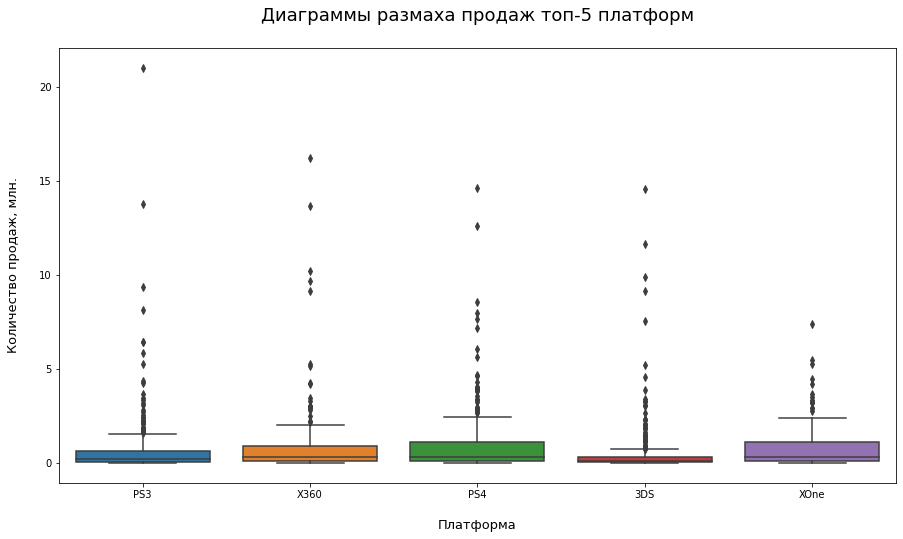

In [27]:
# диаграммы размаха продаж для топ-5 платформ
plt.figure(figsize=(15, 8))
sns.boxplot(data=top_5, x='platform', y='sum_sales');

ax = plt.gca()
ax.set_xlabel("\n" + 'Платформа', fontsize=13)
ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
ax.set_title('Диаграммы размаха продаж топ-5 платформ' + "\n", fontsize=18);

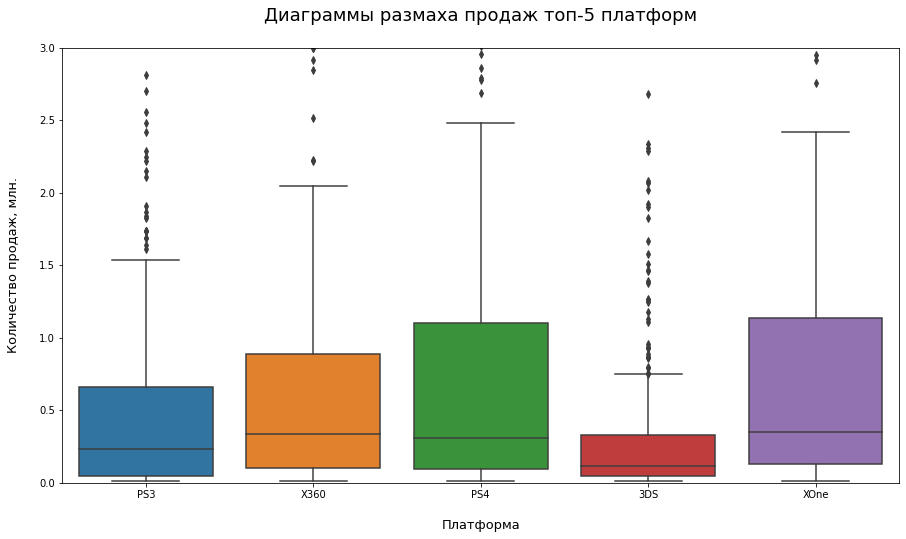

In [28]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=top_5, x='platform', y='sum_sales');

ax = plt.gca()
ax.set_ylim(0,3)
ax.set_xlabel("\n" + 'Платформа', fontsize=13)
ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
ax.set_title('Диаграммы размаха продаж топ-5 платформ' + "\n", fontsize=18);

По первой диаграмме видно, что почти у всех платформ присутствуют выбросы - нетипично высокие продажи. 

По второй - что обе платформы Xbox (X360 и XOne) приносят больше всего прибыли из всех представленных в данном топе.

<a id='p3s4'></a>
#### Оценка влияния отзывов на продажи топ-5 платформ

*Влияние отзывов на продажи одной из платформ-лидеров - PS4*


Коэффицент корреляции продаж с отзывами критиков: 0.43
Коэффицент корреляции продаж с отзывами пользователей: 0.02


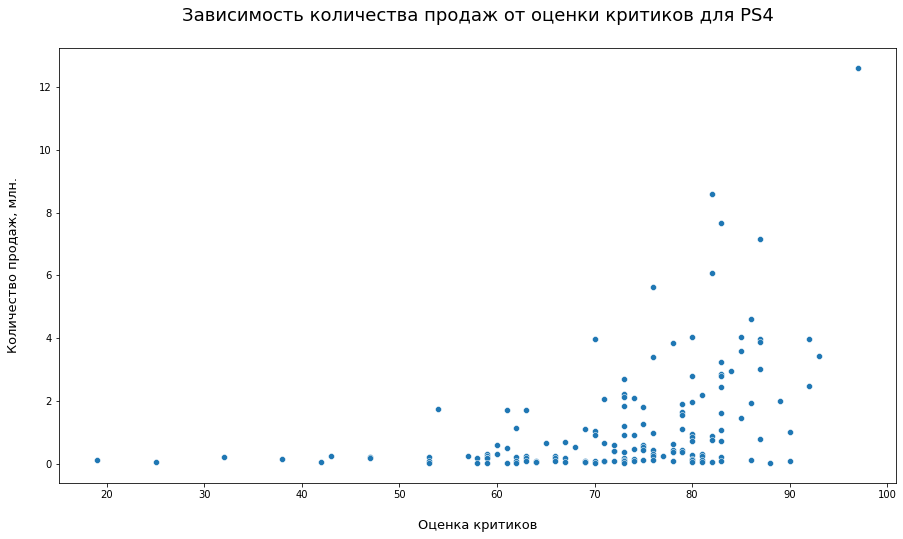

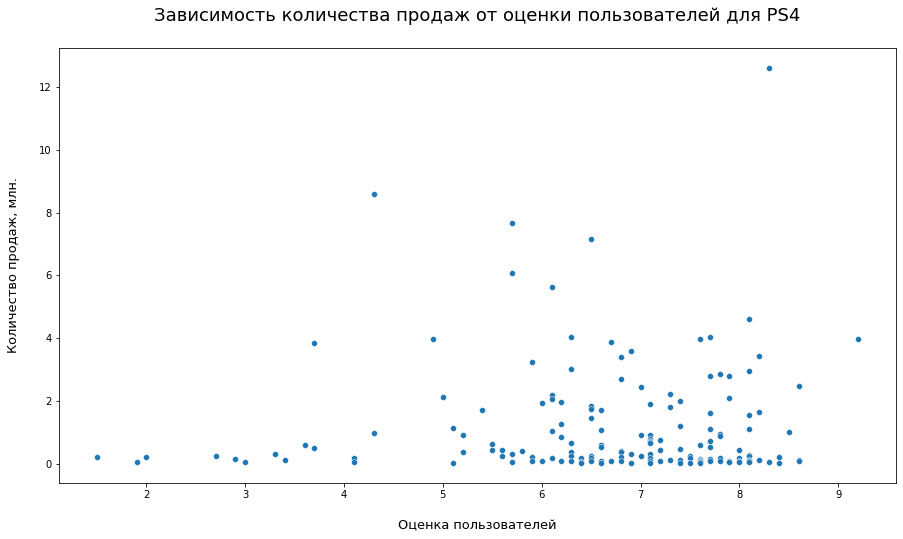

In [29]:
# таблица с данными только для PS4
ps_4 = games.query("platform == 'PS4'")

# диаграмма рассеяния продажи - отзывы критиков
plt.figure(figsize=(15, 8))
sns.scatterplot(data=ps_4, x='critic_score', y='sum_sales');

ax = plt.gca()
ax.set_xlabel("\n" + 'Оценка критиков', fontsize=13)
ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
ax.set_title('Зависимость количества продаж от оценки критиков для PS4' + "\n", fontsize=18);

print('\n' + f"Коэффицент корреляции продаж с отзывами критиков: {ps_4['critic_score'].corr(ps_4['sum_sales']).round(2)}")

# диаграмма рассеяния продажи - отзывы пользователей
plt.figure(figsize=(15, 8))
sns.scatterplot(data=ps_4, x='user_score', y='sum_sales');

ax = plt.gca()
ax.set_xlabel("\n" + 'Оценка пользователей', fontsize=13)
ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
ax.set_title('Зависимость количества продаж от оценки пользователей для PS4' + "\n", fontsize=18);

print(f"Коэффицент корреляции продаж с отзывами пользователей: {ps_4['user_score'].corr(ps_4['sum_sales']).round(2)}")

Из диаграмм рассеяния видно, что большинство купленных игр имело оценку выше среднего, как от пользователей, так и от критиков.
<br>Так же видно, что *прямой зависимости количества продаж от оценок нет*.

*Влияние отзывов на продажи остальных платформ из топ-5*

In [30]:
# ф-ия для построения диаграмм рассеяния продаж остальных платформ из топ-5
def print_graph(plat):

    plt.figure(figsize=(15, 8))
    sns.scatterplot(data=top_5.query('platform == @plat'), x='critic_score', y='sum_sales');
    
    ax = plt.gca()
    ax.set_xlabel("\n" + 'Оценка критиков', fontsize=13)
    ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
    ax.set_title(f'Зависимость количества продаж от оценки критиков для {plat}' + "\n", fontsize=18);

    print("\n" + f"Коэффицент корреляции продаж с отзывами критиков: {top_5.query('platform == @plat')['critic_score'].corr(top_5.query('platform == @plat')['sum_sales']).round(2)}")
    
    plt.figure(figsize=(15, 8))
    sns.scatterplot(data=top_5.query('platform == @plat'), x='user_score', y='sum_sales');
    
    ax = plt.gca()
    ax.set_xlabel("\n" + 'Оценка пользователей', fontsize=13)
    ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
    ax.set_title(f'Зависимость количества продаж от оценки пользователей для {plat}' + "\n", fontsize=18);
    
    print(f"Коэффицент корреляции продаж с отзывами пользователей: {top_5.query('platform == @plat')['user_score'].corr(top_5.query('platform == @plat')['sum_sales']).round(2)}")


Коэффицент корреляции продаж с отзывами критиков: 0.33
Коэффицент корреляции продаж с отзывами пользователей: -0.02


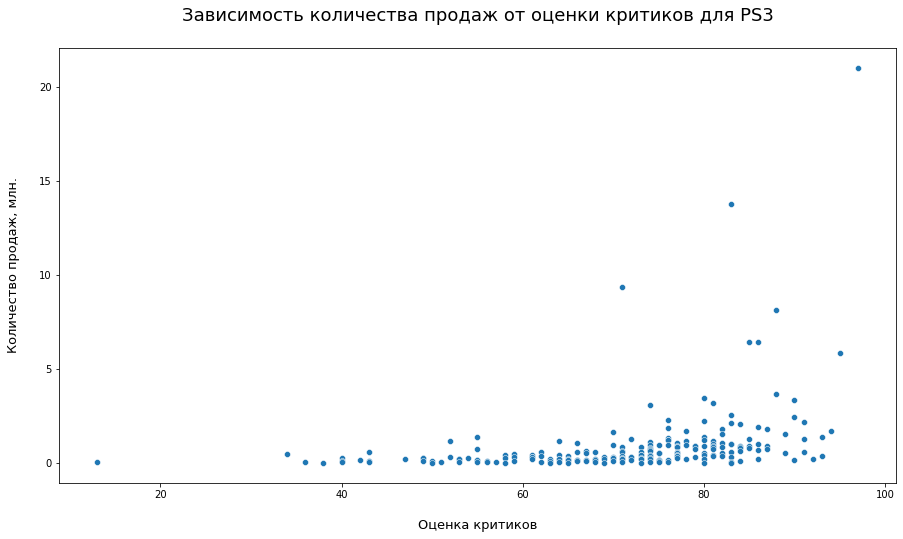

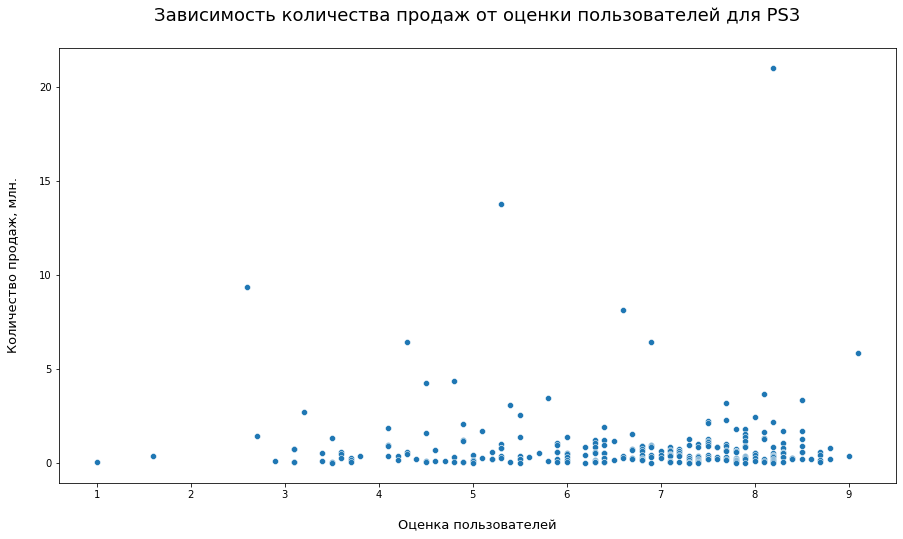

In [31]:
print_graph('PS3')


Коэффицент корреляции продаж с отзывами критиков: 0.36
Коэффицент корреляции продаж с отзывами пользователей: -0.01


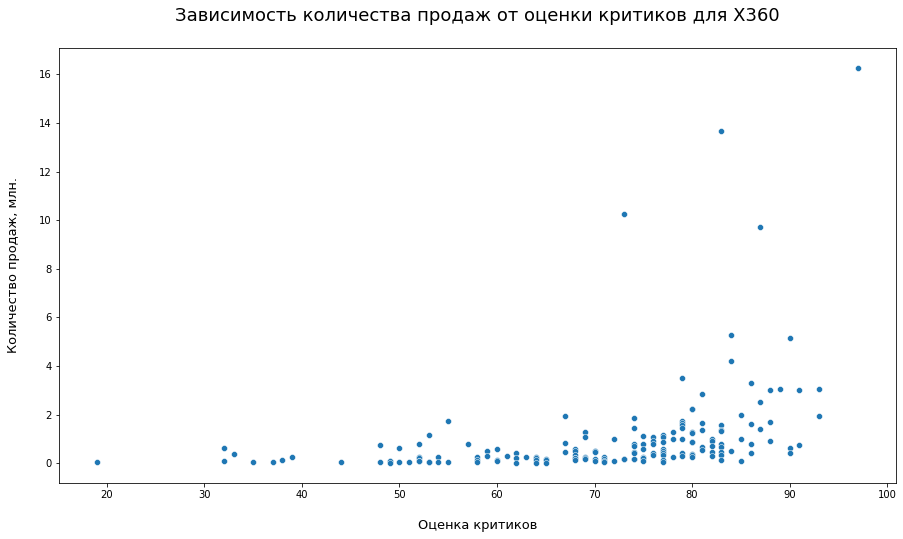

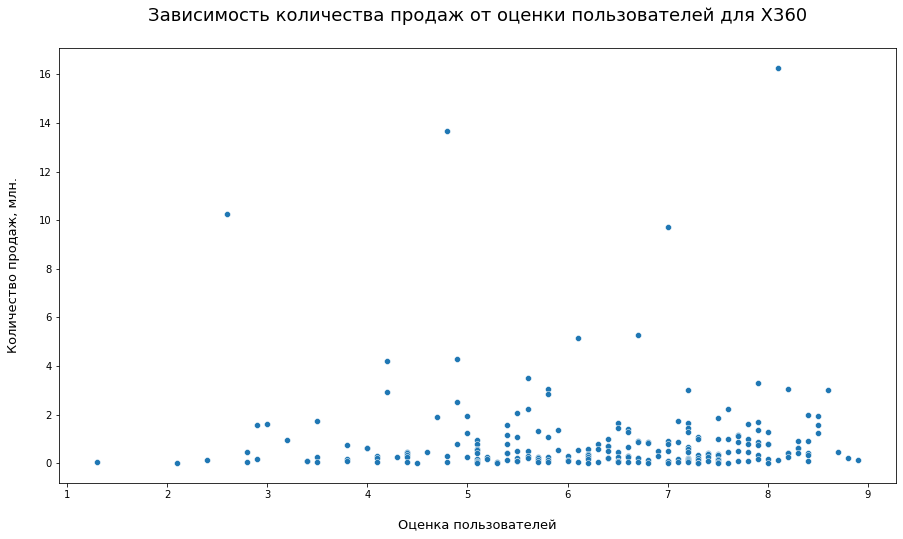

In [32]:
print_graph('X360')


Коэффицент корреляции продаж с отзывами критиков: 0.33
Коэффицент корреляции продаж с отзывами пользователей: 0.21


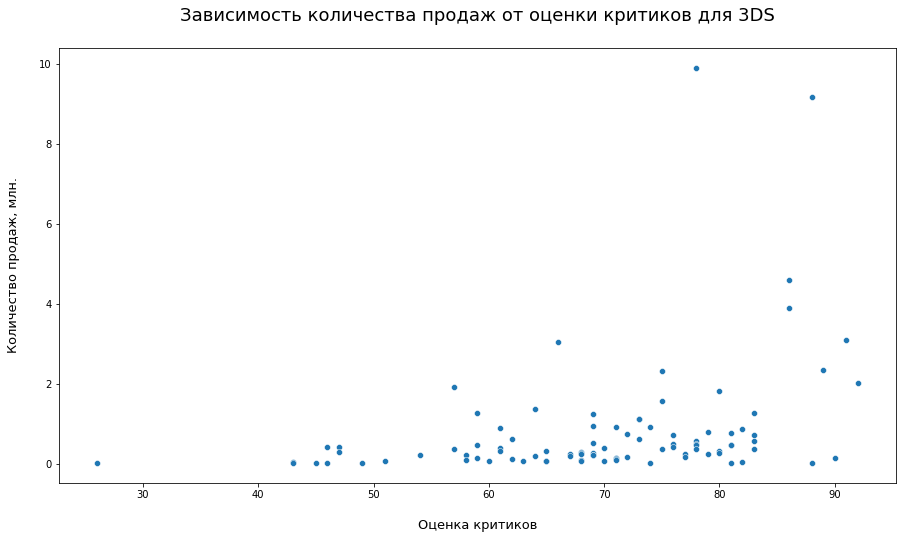

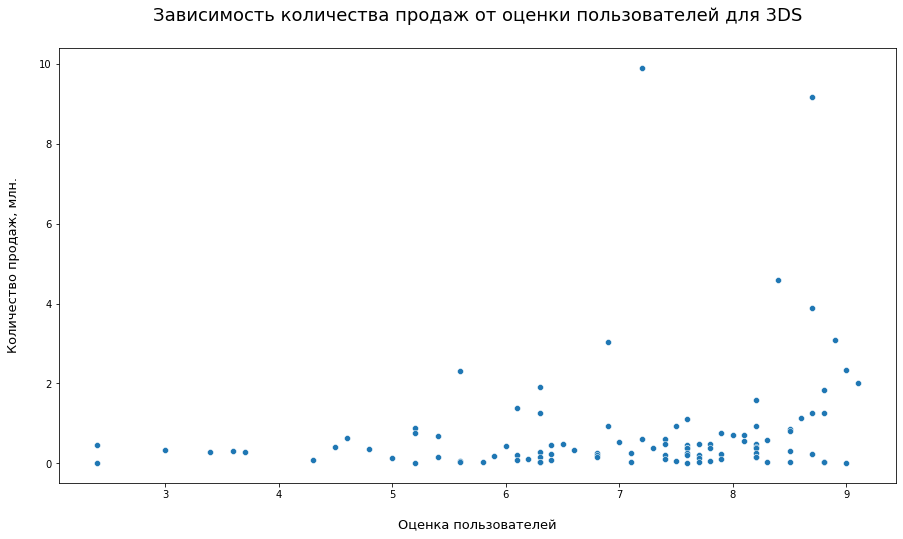

In [33]:
print_graph('3DS')


Коэффицент корреляции продаж с отзывами критиков: 0.46
Коэффицент корреляции продаж с отзывами пользователей: -0.04


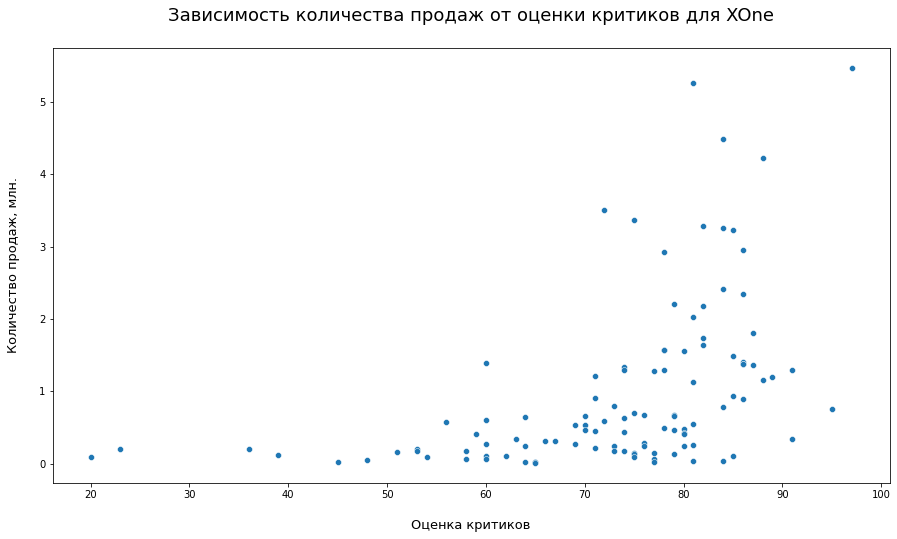

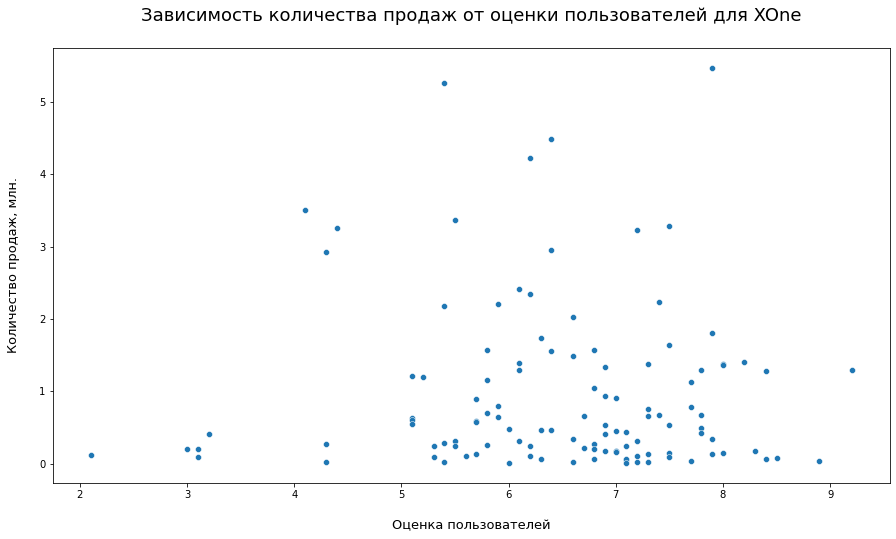

In [34]:
print_graph('XOne')

Как и для PS4, для остальных платформ из топ-5, *не подтвердилась* зависимость продаж от оценок пользователей и критиков.

<a id='p3s5'></a>
#### Исследование зависимости прибыльности игр от жанров

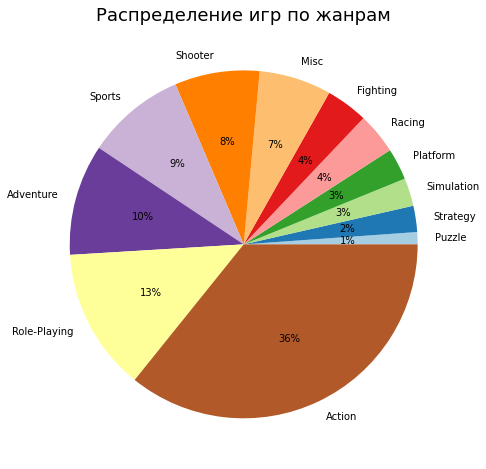

In [35]:
# общее распределение игр по жанрам
genres = games.groupby('genre')['name'].count().sort_values()

plt.figure(figsize=(15, 8))
colors = sns.color_palette('Paired')
labels = genres.index
plt.pie(genres, colors=colors, labels=labels, autopct='%.0f%%')

ax = plt.gca()
ax.set_title('Распределение игр по жанрам', fontsize=18);

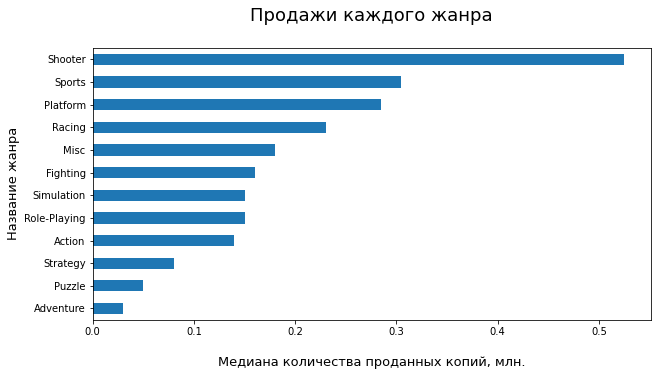

In [36]:
# распределение жанров по прибыльности
games.groupby('genre')['sum_sales'].median() \
     .to_frame() \
     .sort_values(by='sum_sales', ascending=True) \
     .plot(kind='barh', legend=False, figsize=(10, 5));

ax = plt.gca()
ax.set_xlabel("\n" + 'Медиана количества проданных копий, млн.', fontsize=13)
ax.set_ylabel('Название жанра', fontsize=13)
ax.set_title('Продажи каждого жанра' + "\n", fontsize=18);

Самыми покупаемыми оказались игры жанра shooter. В их число входят, например, такие очень популярные по всему миру: GTA, Call Of Duty, Farcry, Half-Life, Stalker и др. Они на слуху, наверное, у каждого человека, кто когда-либо имел отношение к компьютерным играм и интернету. Так же высокая популярность данного жанра может быть обусловлена обширностью его понятия. Например, к shooter могли отнести некоторые игры других жанров, таких, как: action, adventure и т.д.
<br><br>
Самой **высокой** медианой продаж обладают:
- Shooter;
- Sports;
- Platform;
- Racing;
- Misc.

**Самой низкой**:
- Adventure;
- Puzzle;
- Strategy.

<a id='p4'></a>
### [Составление портрета пользователя каждого региона](#section_id4)
* [Исследование региона Северная Америка](#p4s1) 
* [Исследование региона Европа](#p4s2)
* [Исследование региона Япония](#p4s3)

<a id='p4s1'></a>
#### Исследование региона Северная Америка

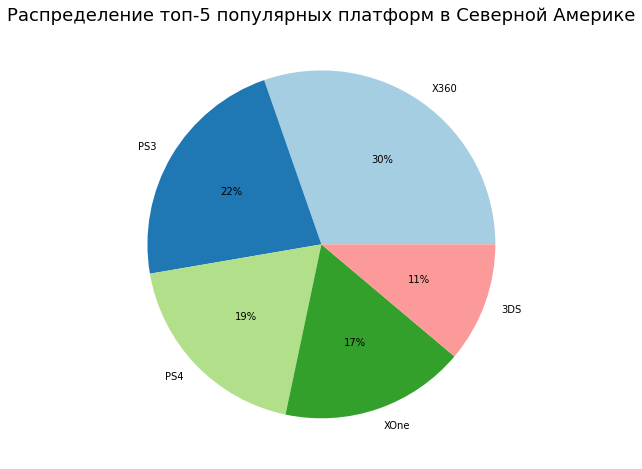

In [37]:
# самые популярные платформы
na_plat = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(15, 8))
colors = sns.color_palette('Paired')
labels = na_plat.index
plt.pie(na_plat, colors=colors, labels=labels, autopct='%.0f%%')

ax = plt.gca()
ax.set_title('Распределение топ-5 популярных платформ в Северной Америке', fontsize=18);

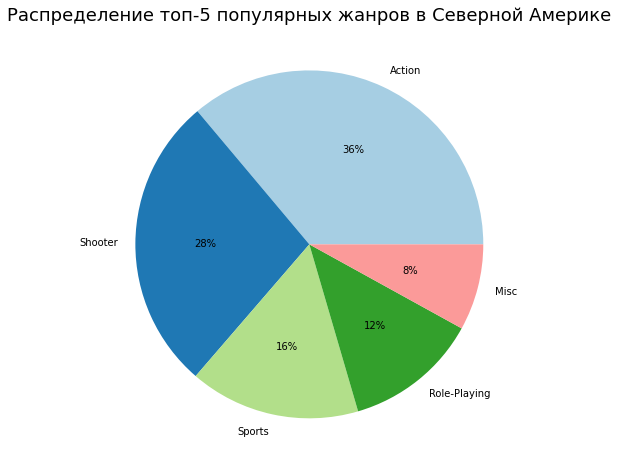

In [38]:
# самые популярные жанры
na_gen = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(15, 8))
colors = sns.color_palette('Paired')
labels = na_gen.index
plt.pie(na_gen, colors=colors, labels=labels, autopct='%.0f%%')

ax = plt.gca()
ax.set_title('Распределение топ-5 популярных жанров в Северной Америке', fontsize=18);

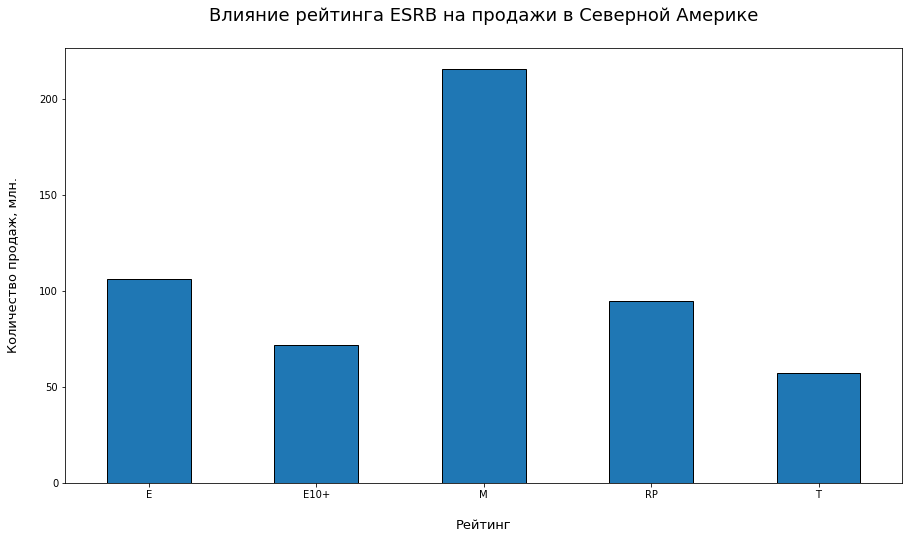

In [39]:
# влияние рейтинга ESRB на продажи
plt.figure(figsize=(15, 8))
games.groupby('rating')['na_sales'].sum().plot(kind='bar', ec='black')

ax = plt.gca()
ax.set_xlabel("\n" + 'Рейтинг', fontsize=13)
ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
ax.set_title('Влияние рейтинга ESRB на продажи в Северной Америке' + "\n", fontsize=18)
ax.tick_params(axis='x', labelrotation = 360);

Среди североамериканских пользователей наибольший интерес представляют игры жанра action, немного отстает жанр shooter. 
Большая популярность X360 и PS3 вероятней всего обусловлена тем, что пользователи еще не успели перейти на новое поколение, и  PS4 с XOne еще не заняли свое место в сердцах геймеров. Так же X360 могла быть наиболее пропиарена на родной земле.
<br>Жанры action и shooter плотно закрепились в топе благодаря своей обширности, action можно присвоить очень многим играм.
<br>Игры с рейтингом M ('mature' - для людей старше 17 лет) ниболее распространены потому что во многих популярных играх присутствуют сцены насилия, ненормативная лексика и т.д.

<a id='p4s2'></a>
#### Исследование региона Европа

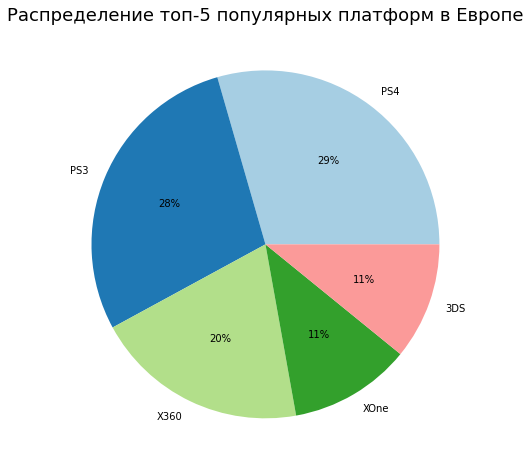

In [40]:
# самые популярные платформы
eu_plat = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(15, 8))
colors = sns.color_palette('Paired')
labels = eu_plat.index
plt.pie(eu_plat, colors=colors, labels=labels, autopct='%.0f%%')


ax = plt.gca()
ax.set_title('Распределение топ-5 популярных платформ в Европе', fontsize=18);

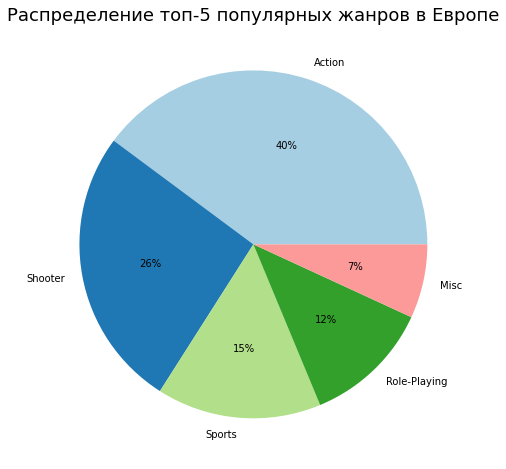

In [41]:
# самые популярные жанры
eu_gen = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(15, 8))
colors = sns.color_palette('Paired')
labels = eu_gen.index
plt.pie(eu_gen, colors=colors, labels=labels, autopct='%.0f%%')

ax = plt.gca()
ax.set_title('Распределение топ-5 популярных жанров в Европе', fontsize=18);

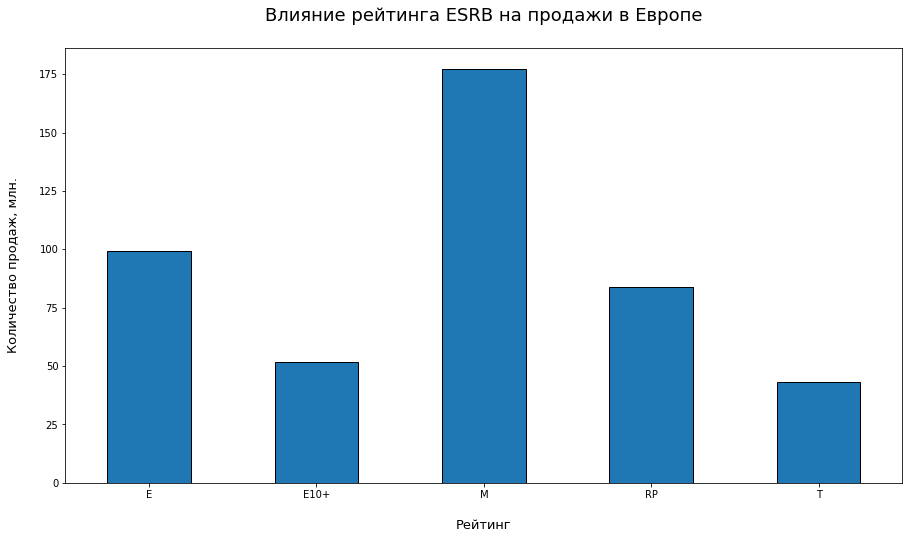

In [42]:
# влияние рейтинга ESRB на продажи
plt.figure(figsize=(15, 8))
games.groupby('rating')['eu_sales'].sum().plot(kind='bar', ec='black')

ax = plt.gca()
ax.set_xlabel("\n" + 'Рейтинг', fontsize=13)
ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
ax.set_title('Влияние рейтинга ESRB на продажи в Европе' + "\n", fontsize=18)
ax.tick_params(axis='x', labelrotation = 360);

PlayStation занимает первые места в топе платформ у европейцев, вероятно, из-за того, что компания Sony уже давно известна пользователям, а так же на ней было выпущенно больше игр (в том числе для одиночной игры), нежели у Microsoft.
<br>Топ жанров и влияние рейтинга на продажи схож с американским, думаю, такие показатели возникли по тем же причинам. В целом, предпочтения этих двух аудиторй очень схожи, судя по приведенному исследованию.

<a id='p4s3'></a>
#### Исследование региона Япония

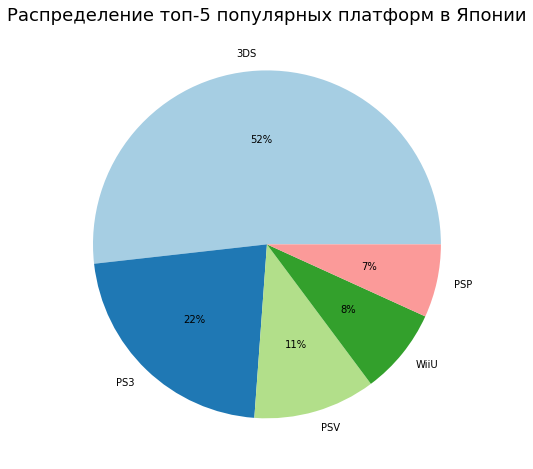

In [43]:
# самые популярные платформы
jp_plat = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(15, 8))
colors = sns.color_palette('Paired')
labels = jp_plat.index
plt.pie(jp_plat, colors=colors, labels=labels, autopct='%.0f%%')

ax = plt.gca()
ax.set_title('Распределение топ-5 популярных платформ в Японии', fontsize=18);

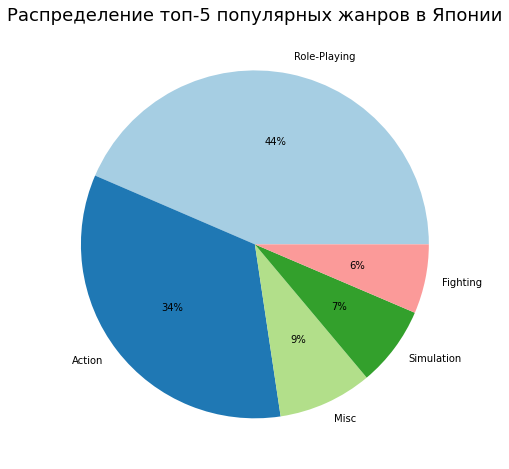

In [44]:
# самые популярные жанры
jp_gen = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(15, 8))
colors = sns.color_palette('Paired')
labels = jp_gen.index
plt.pie(jp_gen, colors=colors, labels=labels, autopct='%.0f%%')

ax = plt.gca()
ax.set_title('Распределение топ-5 популярных жанров в Японии', fontsize=18);

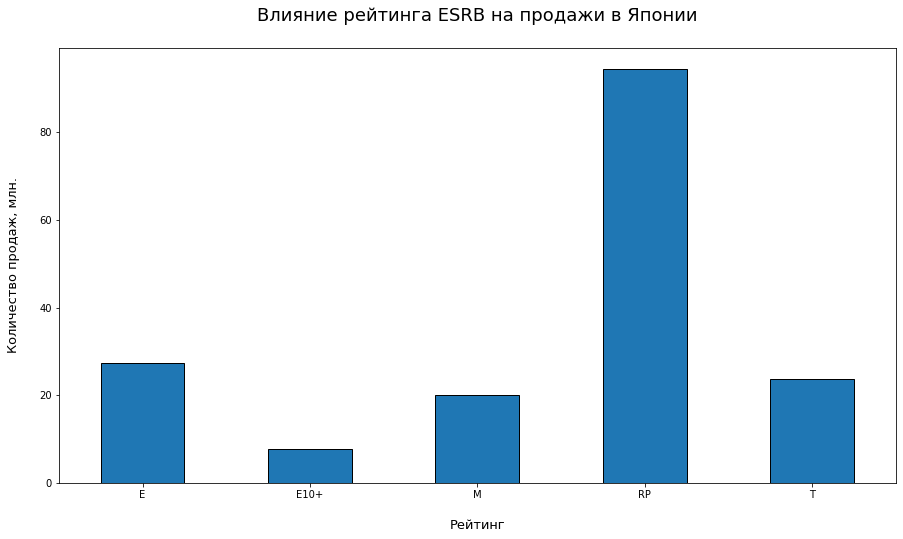

In [45]:
# влияние рейтинга ESRB на продажи
plt.figure(figsize=(15, 8))
games.groupby('rating')['jp_sales'].sum().plot(kind='bar', ec='black')

ax = plt.gca()
ax.set_xlabel("\n" + 'Рейтинг', fontsize=13)
ax.set_ylabel('Количество продаж, млн.' + "\n", fontsize=13)
ax.set_title('Влияние рейтинга ESRB на продажи в Японии' + "\n", fontsize=18)
ax.tick_params(axis='x', labelrotation = 360);

Самым популярным жанром в Японии оказался role-playing. В мире видеоригр даже существует такое понятие, как JRPG - японская ролевая игра. Они имеют специфичный антураж, свойственный и наиболее понятный, естественно, самим жителям Японии. Создаются они ими же и нацелены в основном на аудиторию азиатских стран.
<br>Огромная популярность платформы 3DS, так же, вероятно, обусловлены тем, что она произведена в самой Японии. Возможно, производились какие-нибудь маркетинговые ходы для повышения спроса на данную платформу относительно других (не японских).
<br>Так же заметно, что в Японии большее количество проданных игр не имеет рейтинга ESRB, скорей всего это связано с необязательностью его присвоения для выпуска игры в данной стране.

<a id='p5'></a>
### [Проверка гипотез](#section_id5)

Гипотеза №1

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
<br>H0: средний пользовательский рейтинг (user_score) платформы XOne = средний пользовательский рейтинг (user_score) платформы PC
<br>H1: средний пользовательский рейтинг (user_score) платформы XOne ≠ средний пользовательский рейтинг (user_score) платформы PC

In [46]:
# t-test для проверки гипотезы №1
results = st.ttest_ind(
    games[(games['platform'] == "XOne") & (games['user_score'].notna())]['user_score'],
    games[(games['platform'] == "PC") & (games['user_score'].notna())]['user_score'],
    equal_var= False
)

alpha = 0.05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9441751855931831
Не получилось отвергнуть нулевую гипотезу


Проверка показала, что вероятность получить равные средние пользовательские рейтинги данных платформ 94%, из-за чего мы не можем отвергнуть нулевую гипотезу.

Гипотеза №2

Средние пользовательские рейтинги жанров Action и Sports разные.<br>
<br>H0: средний пользовательский рейтинг (user_score) жанра Action = средний пользовательский рейтинг (user_score) жанра Sports
<br>H1: средний пользовательский рейтинг (user_score) жанра Action results ≠ средний пользовательский рейтинг (user_score) жанра Sports

In [48]:
# t-test для проверки гипотезы №2
results = st.ttest_ind(
    games[(games['genre'] == 'Action') & (games['user_score'].notna())]['user_score'],
    games[(games['genre'] == 'Sports') & (games['user_score'].notna())]['user_score'],
    equal_var= False
)

alpha = 0.05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.7671307856639633e-18
Отвергаем нулевую гипотезу


Проверка показала, что вероятность получить равные средние пользовательские рейтинги данных жанров крайне низка, благодаря чему нулевую гипотезу мы отвергаем и принимаем альтернативную, говорящую об их разности.

Нулевая и альтернативная гипотезы для обоих случаев были сформулированы исходя из задания. Нулевые гипотезы заключались в предположении равенства средних пользовательских рейтингов для заданных платформ (Гипотеза №1) и жанров (Гипотеза №2). Альтернативные гипотезы, соответственно, включали в себя вариант неравенства этих же значений. 
<br>Исходя из того, что нам нужно было проверить гипотезы о равенстве средних значений (пользовательского рейтинга) двух выборок, был выбран соответствующий метод проверки.

<a id='p6'></a>
### [Общий вывод](#section_id6)

В начале исследования, изучив общую информацию о датафрейме, была произведена обработка пропусков в столбцах с рейтингом ESRB и пользовательским рейтингом. В первом случае - заполнены 'RP' для корректной работы с этим столбцом, во втором - значения 'tbd' были приравнены к пропускам.
Строки с пропусками в названии и годе выпуска игры были удалены, т.к. они не поддаются логическому заполнению, а производить анализ без этих данных бессмысленно.
<br>
<br>В некоторых столбцах был изменен тип данных для дальнейшей адекватной их обработки.
<br>
<br>Выяснено, что среднее время жизни платформ составляет около 10-11 лет, за это время им на смену приходят более современные версии (смена поколений).
<br>
<br>Далее рассматривался только период 2012-2015 годов, так как к 2012 году произошла смена поколений платформ, а за 2016 год данные были неполные. Таким образом работа после сужения временного периода стала наиболее актуальна для планирования на 2017 год.
<br>
<br>Топ-5 **платформ-лидеров продаж** по всему миру:
- PS3;
- PS4;
- X360;
- 3DS;
- XOne.

<br>Но **наибольшим потенциалом** обладают:
- PS4;
- XOne.

Продажи платформ PS3, X360 и 3DS начали значительно снижаться с 2013 года, в то время, как PS4 и XOne только появились. Скорее всего, снижение спроса на первые три позиции обусловлено именно интересом к новинкам.
<br>
<br>Для всех платформ из топ-5 по продажам, **не подтвердилась** зависимость продаж от оценок пользователей и критиков.
<br>
<br>Большее количество игр в датафрейме было представлено в жанре action, но оказалось, едва ли не самым малоприбыльным. Самым прибыльным оказался жанр shooter.
<br>
<br>В Северной Америке **наибольший интерес** представляют игры:

**жанра**:
- action;
- shooter.

**платформы**:
- X360;
- PS3.

**рейтинга**:
- М (17+).
<br>

В Европе **наибольший интерес** представляют игры:

**жанра**:
- action;
- shooter.

**платформы**:
- PS4;
- PS3.

**рейтинга**:
- М (17+).
<br>

В Японии **наибольший интерес** представляют игры:

**жанра**:
- action;
- role-playing.

**платформы**:
- 3DS;
- PS3.

**рейтинга**:
- RP (отсутствие рейтинга).

Проверка гипотез показала, что есть 95% вероятность (гипотеза о их равенстве подтвердилась), что пользовательский рейтинг платформ PC и XOne равны и крайне низкая вероятность (гипотеза о их неравенстве подтвердилась), что равны пользовательские рейтинги жанров action и sports.

Таким образом мы выявили наиболее приемлемые параметры для каждого интересующего региона и, с их учетом, можем спланировать кампанию на 2017 год.